## Naive Bayes Classifier

### Preface

**Acknowledgements**

- Naive Bayes Theory: https://www.youtube.com/watch?v=Q8l0Vip5YUw
- Code Basics: Machine Learning Course - [Lesson on Naive Bayes](https://www.youtube.com/watch?v=nHIUYwN-5rM&list=PLeo1K3hjS3uvCeTYTeyfe0-rN5r8zn9rw&index=16)

**Packages**

In [1]:
import pandas as pkg_pandas
import sklearn.datasets as pkg_datasets
import sklearn.model_selection as pkg_model_selection
import sklearn.naive_bayes as pkg_naive_bayes
import sklearn.metrics as pkg_metrics
import sklearn.feature_extraction.text as pkg_text
import sklearn.pipeline as pkg_pipeline
import matplotlib.pyplot as pkg_plot
import seaborn as pkg_seaborn

### Prepare Data

**Load Data**

In [2]:
%matplotlib inline

In [3]:
dataset = pkg_datasets.load_wine()
dir(dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
dataset["DESCR"]

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                     

In [5]:
dataset.target.shape, dataset.target

((178,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]))

In [6]:
column_names = []
for feature_name in dataset.feature_names:
    column_name = feature_name.replace(' ', '_').replace('/','_')
    column_names.append(column_name)

print("\nFeature Names = {}\nTarget Names = {}\nColumn Names={}".format(\
    dataset.feature_names, dataset.target_names, column_names))


Feature Names = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Names = ['class_0' 'class_1' 'class_2']
Column Names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280_od315_of_diluted_wines', 'proline']


In [7]:
dataset_df = pkg_pandas.DataFrame(dataset.data, columns=column_names)
dataset_df['class'] = dataset.target
dataset_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Curate Data**

In [8]:
# Find columns which have NaN values
dataset_df.columns[dataset_df.isna().any()]

Index([], dtype='object')

Curation Notes:
- There are no cells with NaN value, so nothing to fill
- There are no columns with non-numerical value(s), so nothing to encode
- In short, no curation work

**Split Data**

In [9]:
output_column_name = "class"
baseline_outputs = dataset_df[output_column_name]
baseline_inputs = dataset_df.drop(columns=[output_column_name])

In [10]:
train_inputs, test_inputs, train_outputs, test_outputs = \
    pkg_model_selection.train_test_split(baseline_inputs, baseline_outputs, test_size=0.25)

train_inputs.shape, test_inputs.shape, train_outputs.shape, test_outputs.shape

((133, 13), (45, 13), (133,), (45,))

### Process Data

**Common Methods**

In [11]:
def nb_fit_predict(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    y_predicted = model.predict(x_test)

    return score, y_predicted

In [12]:
def display_deviation_matrix(y_actual, y_predicted):
    cm = pkg_metrics.confusion_matrix(y_true=y_actual, y_pred=y_predicted)
    pkg_plot.figure(figsize=(4,3))
    pkg_plot.xlabel('Predicted')
    pkg_plot.xlabel('Actual')
    pkg_seaborn.heatmap(cm, annot=True)

In [13]:
def perform_naive_bayes(plot_title, model, x_train, y_train, x_test, y_test):
    score, y_predicted = nb_fit_predict(model, x_train, y_train, x_test, y_test)
    display_deviation_matrix(plot_title, y_test, y_predicted)
    return score

**Model: Multinomial Naive Bayes**

Accuracy Score (Multinomial Naive Bayes) = 0.8888888888888888


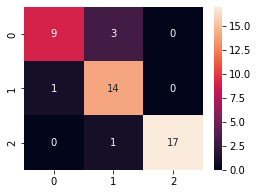

In [14]:
model_name = 'Multinomial Naive Bayes'
score, predicted_outputs = nb_fit_predict(pkg_naive_bayes.MultinomialNB(), \
    train_inputs, train_outputs, test_inputs, test_outputs)
print("Accuracy Score ({}) = {}".format(model_name, score))
display_deviation_matrix(test_outputs, predicted_outputs)

**Model: Gaussian Naive Bayes**

Accuracy Score (Gaussian Naive Bayes) = 1.0


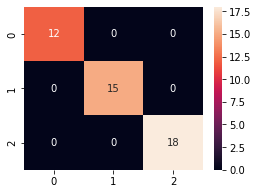

In [15]:
model_name = 'Gaussian Naive Bayes'
score, predicted_outputs = nb_fit_predict(pkg_naive_bayes.GaussianNB(), \
    train_inputs, train_outputs, test_inputs, test_outputs)
print("Accuracy Score ({}) = {}".format(model_name, score))
display_deviation_matrix(test_outputs, predicted_outputs)